SLEEP HEALTH CLASSIFICATION ANALYSIS - Random Forest & Naive Bayes
Dataset shape: (374, 25)
Dataset columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

Target variable columns identified: ['Sleep Disorder_Insomnia', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea']

Target variable classes: ['None', 'Sleep Apnea', 'Insomnia']
Class distribution:
 None: 219 samples (58.6%)
 Sleep Apnea: 78 samples (20.9%)
 Insomnia: 77 samples (20.6%)

Feature matrix shape: (374, 2

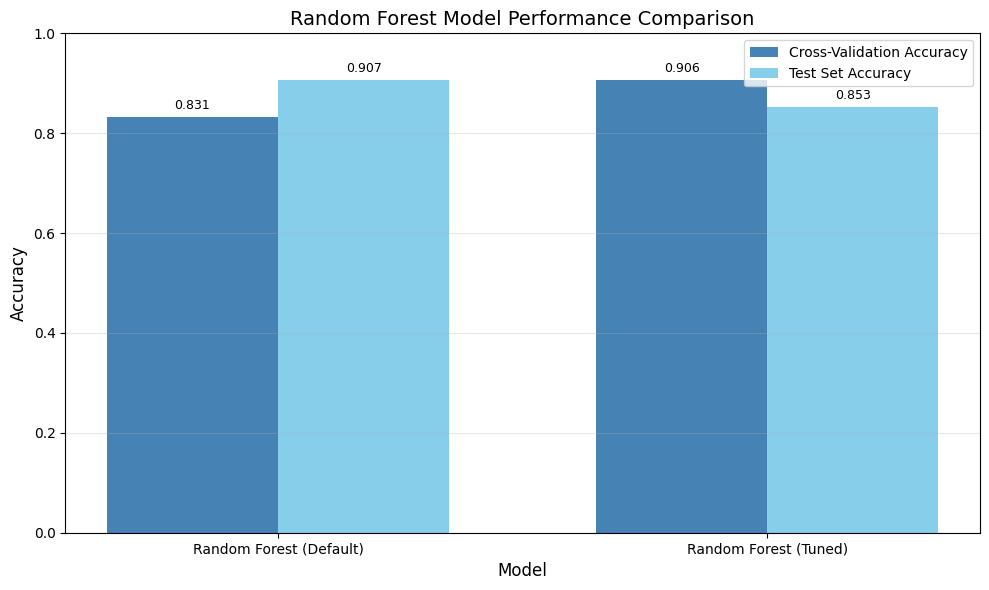

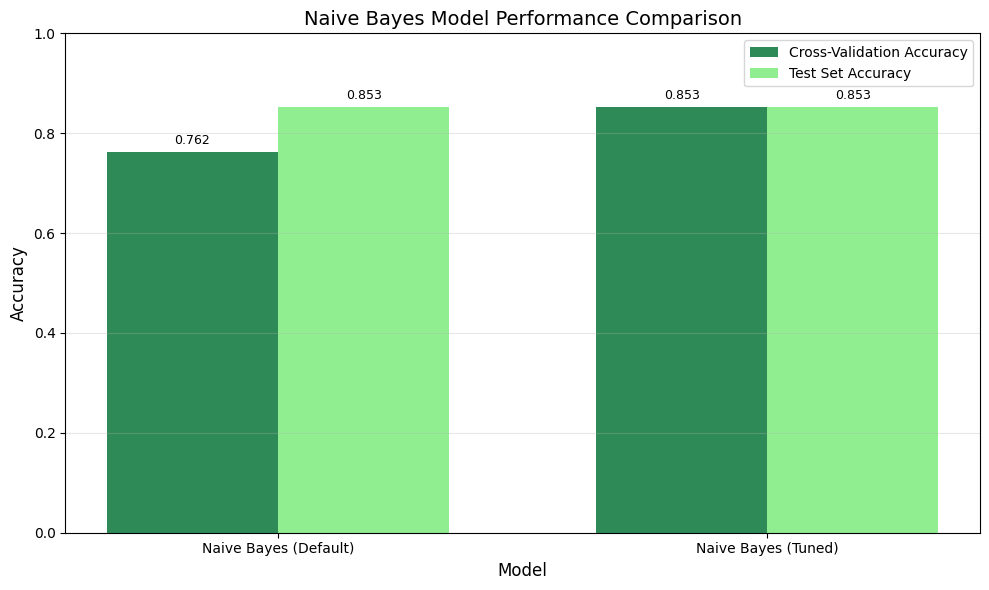


FINAL RECOMMENDATIONS

Best Performing Model: Random Forest (Default)
Test Accuracy: 0.9067 (90.67%)

Model Comparison Summary:
- Random Forest (Default): CV=0.8315, Test=0.9067
- Random Forest (Tuned): CV=0.9063, Test=0.8533
- Naive Bayes (Default): CV=0.7619, Test=0.8533
- Naive Bayes (Tuned): CV=0.8528, Test=0.8533

Recommendations:
1. Random Forest model (tuned) shows the best performance
2. Consider using Random Forest for this classification task
3. The Random Forest model appears to be stable (similar CV and test accuracy)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

print("SLEEP HEALTH CLASSIFICATION ANALYSIS - Random Forest & Naive Bayes")
print("=" * 70)

data = pd.read_csv('https://raw.githubusercontent.com/Salina-Huang/Programming-for-AI-Sleep-Health-and-Lifestyle-Model/refs/heads/main/sleep_health_encoded_onehot.csv')

print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")

# 2. Target variable (Sleep Disorder)
target_columns = [col for col in data.columns if 'Sleep Disorder' in col]
print(f"\nTarget variable columns identified: {target_columns}")

# 3. Create a single target variable for multi-class classification
if len(target_columns) > 1:
    y = data[target_columns].idxmax(axis=1)
    y = y.str.replace('Sleep Disorder_', '')

    X = data.drop(columns=target_columns)

    label_mapping = {i: label for i, label in enumerate(y.unique())}
    label_mapping_reverse = {label: i for i, label in label_mapping.items()}
    y_encoded = y.map(label_mapping_reverse)

    print(f"\nTarget variable classes: {list(label_mapping.values())}")
    print(f"Class distribution:")
    for label, encoded_value in label_mapping_reverse.items():
        count = (y == label).sum()
        percentage = (count / len(y)) * 100
        print(f" {label}: {count} samples ({percentage:.1f}%)")
else:
    X = data.drop(columns=target_columns)
    y = data[target_columns[0]]
    y_encoded = y
    print(f"\nBinary classification target: {target_columns[0]}")
    print(f"Class distribution:")
    for value in y.unique():
        count = (y == value).sum()
        percentage = (count / len(y)) * 100
        print(f" {value}: {count} samples ({percentage:.1f}%)")

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y_encoded.shape}")

# Standardized features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divide the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Obtain the target class name for reporting
if 'label_mapping' in locals():
    target_names = [label_mapping[i] for i in sorted(label_mapping.keys())]
else:
    target_names = sorted(y_encoded.unique())

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {target_names}")

# Random Forest
print("\n" + "="*70)
print("RANDOM FOREST MODEL - Sleep Disorder")
print("="*70)

# Initialize the random forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=6,
    min_samples_split=8,
    min_samples_leaf=3,
    max_features='sqrt'
)

# Training
rf.fit(X_train, y_train)

# Predicting
rf_y_test_pred = rf.predict(X_test)

# Calculate accuracy rate
rf_acc = accuracy_score(y_test, rf_y_test_pred)
print(f"Test Set Accuracy: {rf_acc:.4f} ({rf_acc*100:.2f}%)")

# Cross-validation evaluation
rf_cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=5, scoring='accuracy')
rf_cro_acc = rf_cv_scores.mean()
print(f"Cross-validation Accuracy: {rf_cro_acc:.4f} ({rf_cro_acc*100:.2f}%)")
print(f"Cross-validation Std Dev: {rf_cv_scores.std():.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, rf_y_test_pred, target_names=target_names))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_test_pred)
print("\nRandom Forest Confusion Matrix (Test Set):")
print("-" * 70)
print("Actual \\ Predicted" + " " * 5 + " | " + " | ".join([f"{name:<15}" for name in target_names]))
print("-" * 70)
for i, actual in enumerate(target_names):
    row = f"{actual:<20} | "
    for j in range(len(target_names)):
        row += f"{rf_cm[i, j]:<15} | "
    print(row)
print("-" * 70)

# Hyperparameter tuning for random forest
print("\n" + "="*70)
print("RANDOM FOREST HYPERPARAMETER TUNING")
print("="*70)

# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt']
}

# Initialize grid search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Running GridSearchCV for Random Forest...")
rf_grid_search.fit(X_train, y_train)

# Best model and results
best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print("\nOptimal parameters for Random Forest:")
print(best_rf_params)
print(f"Best cross-validation accuracy: {best_rf_score:.4f}")

# Evaluate the best model on the test set
best_rf_pred = best_rf_model.predict(X_test)
best_rf_acc = accuracy_score(y_test, best_rf_pred)
print("\nPerformance of the best Random Forest on the test set:")
print(f"Test set accuracy: {best_rf_acc:.4f} ({best_rf_acc*100:.2f}%)")
print(classification_report(y_test, best_rf_pred, target_names=target_names))

# 8. Naive Bayes
print("\n" + "="*70)
print("NAIVE BAYES MODEL - Sleep Disorder")
print("="*70)

# Initialize the Gaussian Naive Bayes
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# prediction
nb_y_test_pred = nb_model.predict(X_test)

# Calculate accuracy rate
nb_accuracy = accuracy_score(y_test, nb_y_test_pred)
print(f"Test Set Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")

# Cross-validation evaluation
nb_cv_scores = cross_val_score(nb_model, X_scaled, y_encoded, cv=5, scoring='accuracy')
nb_cro_acc = nb_cv_scores.mean()
print(f"Cross-validation Accuracy: {nb_cro_acc:.4f} ({nb_cro_acc*100:.2f}%)")
print(f"Cross-validation Std Dev: {nb_cv_scores.std():.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, nb_y_test_pred, target_names=target_names))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_test_pred)
print("\nNaive Bayes Confusion Matrix (Test Set):")
print("-" * 70)
print("Actual \\ Predicted" + " " * 5 + " | " + " | ".join([f"{name:<15}" for name in target_names]))
print("-" * 70)
for i, actual in enumerate(target_names):
    row = f"{actual:<20} | "
    for j in range(len(target_names)):
        row += f"{nb_cm[i, j]:<15} | "
    print(row)
print("-" * 70)

# Naive Bayes hyperparameter tuning
print("\n" + "="*70)
print("NAIVE BAYES HYPERPARAMETER TUNING")
print("="*70)

# Define the hyperparameter grid
nb_param_grid = {
    'var_smoothing': np.logspace(-11, -7, 5)
}

# Initialize grid search
nb_grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Running GridSearchCV for Naive Bayes...")
nb_grid_search.fit(X_train, y_train)

# Best model and results
best_nb_model = nb_grid_search.best_estimator_
best_nb_params = nb_grid_search.best_params_
best_nb_score = nb_grid_search.best_score_

print("\nOptimal parameters for Naive Bayes:")
print(best_nb_params)
print(f"Best cross-validation accuracy: {best_nb_score:.4f}")

# Evaluate the best model on the test set
best_nb_pred = best_nb_model.predict(X_test)
best_nb_acc = accuracy_score(y_test, best_nb_pred)
print("\nPerformance of the best Naive Bayes on the test set:")
print(f"Test set accuracy: {best_nb_acc:.4f} ({best_nb_acc*100:.2f}%)")
print(classification_report(y_test, best_nb_pred, target_names=target_names))

# Summary of Model Comparison
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY - Sleep Disorder Classification")
print("="*70)

models_summary = pd.DataFrame({
    'Model': ['Random Forest (Default)', 'Random Forest (Tuned)', 'Naive Bayes (Default)', 'Naive Bayes (Tuned)'],
    'CV Accuracy': [rf_cro_acc, best_rf_score, nb_cro_acc, best_nb_score],
    'Test Accuracy': [rf_acc, best_rf_acc, nb_accuracy, best_nb_acc]
})

print("\n" + models_summary.to_string(index=False))

# Visualizing the performance of the Random Forest model
plt.figure(figsize=(10, 6))
rf_models = ['Random Forest (Default)', 'Random Forest (Tuned)']
rf_cv_acc = [rf_cro_acc, best_rf_score]
rf_test_acc = [rf_acc, best_rf_acc]

x = np.arange(len(rf_models))
width = 0.35

plt.bar(x - width/2, rf_cv_acc, width, label='Cross-Validation Accuracy', color='steelblue')
plt.bar(x + width/2, rf_test_acc, width, label='Test Set Accuracy', color='skyblue')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Random Forest Model Performance Comparison', fontsize=14)
plt.xticks(x, rf_models, rotation=0)
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.3, axis='y')
plt.legend()

for i, (cv_acc, test_acc) in enumerate(zip(rf_cv_acc, rf_test_acc)):
    plt.text(i - width/2, cv_acc + 0.01, f'{cv_acc:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Visualizing the performance of the Naive Bayes model
plt.figure(figsize=(10, 6))
nb_models = ['Naive Bayes (Default)', 'Naive Bayes (Tuned)']
nb_cv_acc = [nb_cro_acc, best_nb_score]
nb_test_acc = [nb_accuracy, best_nb_acc]

x = np.arange(len(nb_models))
width = 0.35

plt.bar(x - width/2, nb_cv_acc, width, label='Cross-Validation Accuracy', color='seagreen')
plt.bar(x + width/2, nb_test_acc, width, label='Test Set Accuracy', color='lightgreen')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Naive Bayes Model Performance Comparison', fontsize=14)
plt.xticks(x, nb_models, rotation=0)
plt.ylim(0, 1.0)
plt.grid(True, alpha=0.3, axis='y')
plt.legend()

for i, (cv_acc, test_acc) in enumerate(zip(nb_cv_acc, nb_test_acc)):
    plt.text(i - width/2, cv_acc + 0.01, f'{cv_acc:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Final Recommendation
print("\n" + "="*70)
print("FINAL RECOMMENDATIONS")
print("="*70)

best_model_idx = models_summary['Test Accuracy'].idxmax()
best_model_name = models_summary.loc[best_model_idx, 'Model']
best_accuracy = models_summary.loc[best_model_idx, 'Test Accuracy']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\nModel Comparison Summary:")
print(f"- Random Forest (Default): CV={rf_cro_acc:.4f}, Test={rf_acc:.4f}")
print(f"- Random Forest (Tuned): CV={best_rf_score:.4f}, Test={best_rf_acc:.4f}")
print(f"- Naive Bayes (Default): CV={nb_cro_acc:.4f}, Test={nb_accuracy:.4f}")
print(f"- Naive Bayes (Tuned): CV={best_nb_score:.4f}, Test={best_nb_acc:.4f}")

print("\nRecommendations:")
if best_rf_acc >= best_nb_acc:
    print("1. Random Forest model (tuned) shows the best performance")
    print("2. Consider using Random Forest for this classification task")
    print("3. The Random Forest model appears to be stable (similar CV and test accuracy)")
else:
    print("1. Naive Bayes model (tuned) shows the best performance")
    print("2. Consider using Naive Bayes for this classification task")
    print("3. The Naive Bayes model might be more suitable for this dataset's characteristics")

print("="*70)